[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[-1.13495935 -0.56290236 -0.56584587 -0.64750124 -0.50828346  0.14829792
 -0.1968947  -0.31525647 -0.32355534 -0.07999167 -0.25124728 -0.00650322
 -0.04505981 -0.17696796  0.09217412  0.43108957 -0.0890181   0.34486443
  1.17206133  1.67250799]


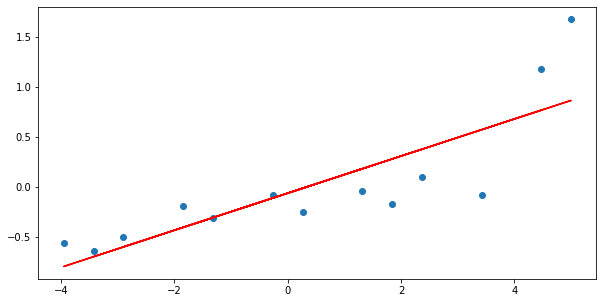

(7, 1)
MSE on training data is: 0.1351415282465212
MSE on test data is: 0.1802486924026015


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_toy_data(n_points=20, noise_std=0.25):

    x = np.linspace(-5, 5, n_points)

    #define a function relating input to output
    f = lambda x: 0.01 * x**3

    #generate noisy training labels
    y = f(x) + np.random.normal(0, noise_std, n_points)
    
    return x, y

# Problem 0
# Mean Abs Error: situations where you would want ot ignore outliers
# Mean Square Error: situations where outliers are not too big a problem i.e. not
#  a lot of noise
# Max Abs Error; Situation where the worst case scenario is not acceptable
#  such as in medical trials where people DIE in the worst case scenario. 

x, y = generate_toy_data()
print(x)
print(y)
# We are splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# Instantiating a regressor
linear_regressor = LinearRegression()
# Fitting the model to the training data 
linear_regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
# 3. Make prediction on test input data 
y_train_pred = linear_regressor.predict(x_train.reshape(-1,1))
# 4. Visualize results
f, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
ax.scatter(x_train, y_train) # scatter plot the training data
ax.plot(x_train, y_train_pred, 'r')  # plot the learned linear regression function by plotting the predictions
plt.show() # display the figure)

training_mse = mean_squared_error(y_train, y_train_pred)

y_pred_test = linear_regressor.predict(y_test.reshape(-1, 1))

test_mse = mean_squared_error(y_test, y_pred_test)

print('MSE on training data is: {}'.format(training_mse))
print('MSE on test data is: {}'.format(test_mse))

[ 4  0  7 12  9  5 10  8  3 11  2  1  6]
[-3.94736842 -3.42105263 -2.89473684 -1.84210526 -1.31578947 -0.26315789
  0.26315789  1.31578947  1.84210526  2.36842105  3.42105263  4.47368421
  5.        ]
[-0.41283128 -0.46444311 -0.4971431  -0.50580761 -0.48177212 -0.37696566
 -0.29619468 -0.07791724  0.05958922  0.21600751  0.58557958  1.03079897
  1.28177641]
[ 4  0  7 12  9  5 10  8  3 11  2  1  6]
[-3.94736842 -3.42105263 -2.89473684 -1.84210526 -1.31578947 -0.26315789
  0.26315789  1.31578947  1.84210526  2.36842105  3.42105263  4.47368421
  5.        ]
[-0.74999301 -0.52623838 -0.37133394 -0.22158402 -0.20349274 -0.22276305
 -0.23687884 -0.21595721 -0.15767399 -0.05201196  0.34794011  1.07688218
  1.59378172]
[ 4  0  7 12  9  5 10  8  3 11  2  1  6]
[-3.94736842 -3.42105263 -2.89473684 -1.84210526 -1.31578947 -0.26315789
  0.26315789  1.31578947  1.84210526  2.36842105  3.42105263  4.47368421
  5.        ]
[-0.59232232 -0.58335215 -0.51730822 -0.3216067  -0.2313764  -0.1215953
 -0.1

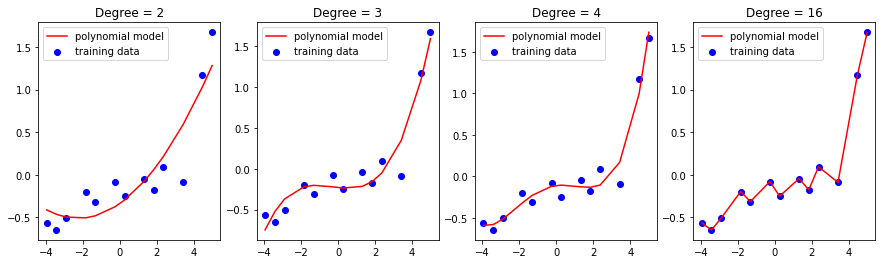

In [26]:
# Make a list of polynomial degrees we want to try
poly_degree = np.array([2, 3, 4, 16])

# Visualize the three models in a figure with one row and 3 columns, with size 15x5
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

# Iterate over the polynomial degrees and the subplots in the figure
for i in range(len(poly_degree)):

  ax[i].scatter(x_train, y_train, color='blue', label='training data') # scatter plot the training data

  # Step 1: 
  # Instantiate a sklearn PolynomialFeatures model of degree=poly_degree[i] 
  # and transform both the training and the testing data to add polynomial features to our datasets.
  # (Hint: look for documentation on sklearn.preprocessing.PolynomialFeatures)
  degree = poly_degree[i]
  poly_regressor = PolynomialFeatures(degree=degree)

  x_train_trans = poly_regressor.fit_transform(x_train.reshape(-1, 1))
  x_test_trans = poly_regressor.fit_transform(x_test.reshape(-1, 1))

  #
  # Step 2:
  # Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
  # You should set fit_intercept=False for this LinearRegression model, since the intercept is already
  # generated by PolynomialFeatures
  linear_regressor = LinearRegression(fit_intercept=False)
  linear_regressor.fit(x_train_trans, y_train)

  y_train_pred = linear_regressor.predict(x_train_trans)

  #
  # Step 3:
  # Plot the learned polynomial regression model by plotting the model prediction against the training input 
  sorted_indices = x_train.argsort()
  print(sorted_indices)
  print(x_train[sorted_indices])
  print(y_train_pred[sorted_indices])
  #
  ax[i].plot(x_train[sorted_indices], y_train_pred[sorted_indices], color='red', label='polynomial model')
  #
  # Step 4:
  # Compute and print the training and test MSE.
  # COMPLETE
  #
  # mse_train = ...
  # mse_test = ...
  #
  # print('For degree {}, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(poly_degree[i], mse_train, mse_test))

  ax[i].set_title('Degree = {}'.format(poly_degree[i])) # set the title of the ith subplot
  ax[i].legend(loc='best') # display the legend for the plot

plt.show() # display the figure

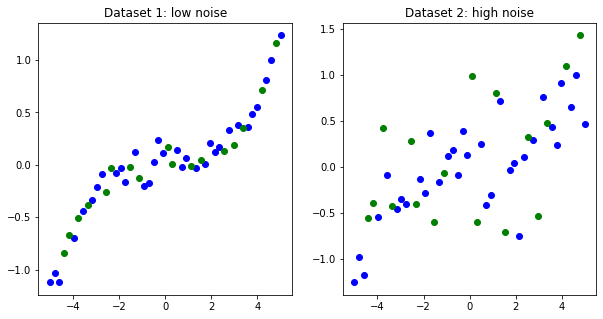

In [27]:
np.random.seed(10)
# DATASET 1
x1, y1 = generate_toy_data(n_points=50, noise_std=0.1) # generate low noise data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33, random_state=42) #split data into training and test

# DATASET 2
x2, y2 = generate_toy_data(n_points=50, noise_std=0.4) # generate high noise data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=42) #split data into training and test

# Visualize the two datasets in a figure with one row and 2 columns, with size 10x5
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x_train1, y_train1, color='blue') # plot dataset 1
ax[1].scatter(x_train2, y_train2, color='blue') # plot dataset 2

ax[0].scatter(x_test1, y_test1, color='green') # plot dataset 1
ax[1].scatter(x_test2, y_test2, color='green') # plot dataset 2

ax[0].set_title('Dataset 1: low noise') # set the title for subplot 1
ax[1].set_title('Dataset 2: high noise') # set the title for subplot 2

plt.show() # display the figure

In [ ]:
# Visualize the two models in a figure with one row and 2 columns, with size 10x5
fig, ax = plt.subplots(1, 2,figsize=(10, 5))

# Step 1:
# Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
x1_shaped = x1.reshape(-1, 1)
y1_shaped = y1.reshape(-1, 1)p

linear_regressor = LinearRegression()
linear_regressor.fit(x1_shaped, y1)

y
#
# Step 2:
# Plot the learned linear regression model by plotting the model prediction against the training input 
# COMPLETE
#
# ax[0].plot(x_train, y_train_pred, color='red', label='polynomial model')
#
# Step 3:
# Compute and print the training and test MSE.
# COMPLETE
#
# mse_train = ...
# mse_test = ...
#
# print('For low noise dataset, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(mse_train, mse_test))

ax[0].scatter(x_train1, y_train1, color='blue') # plot dataset 1
ax[0].scatter(x_test1, y_test1, color='green') # plot dataset 1
ax[0].set_title('Low Noise Dataset')

# Step 1: 
# Instantiate a sklearn PolynomialFeatures model of degree=3 
# and transform both the training and the testing data to add polynomial features to our datasets.
# (Hint: look for documentation on sklearn.preprocessing.PolynomialFeatures)
## COMPLETE
#
# Step 2:
# Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
## COMPLETE
#
# Step 3:
# Plot the learned polynomial regression model by plotting the model prediction against the training input 
# COMPLETE
#
# ax[1].plot(x_train, y_train_pred, color='red', label='polynomial model')
#
# Step 4:
# Compute and print the training and test MSE.
# COMPLETE
#
# mse_train = ...
# mse_test = ...
#
# print('For high noise dataset, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(mse_train, mse_test))

ax[1].scatter(x_train2, y_train2, color='blue') # plot dataset 2
ax[1].scatter(x_test2, y_test2, color='green') # plot dataset 2
ax[1].set_title('High Noise Dataset')

plt.show()